In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import sys
sys.path.append("../")

from kernel import InverseMultiquadricKernelPytouch
from mtgp import MultiTaskGaussianProcessImplicitSurfaces

import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.style.use("ggplot")

%matplotlib inline

In [2]:
def plot_all(model, kernel, x1, y1, x2, y2, rate):
    print("----- before learning -----")
    print(model.task_params_to_psd())
    model.learning(max_iter=4000)
    print("----- after learning -----")
    print(model.task_params_to_psd())

    x   = np.linspace(-10, 70, 100)[:, None] * rate
    y   = np.linspace(-10, 70, 100)[:, None] * rate
    x,y = np.meshgrid(x, y)
    xx  = x.ravel()[:, None]
    yy  = y.ravel()[:, None]
    XX  = np.concatenate([xx, yy], 1)
    XX  = torch.from_numpy(XX).float()
    
    mm1, ss1 = model.predict(XX, 0)
    mm2, ss2 = model.predict(XX, 1)

    mm1 = mm1.reshape(x.shape)
    mm2 = mm2.reshape(x.shape)

    z = mm2.numpy()

    xyz = plt.pcolormesh(x, y, z, cmap='Greens', shading="gouraud", vmax=z.max(), vmin=z.min())
    plt.scatter(x1.ravel(), y1.ravel())
    plt.scatter(x2.ravel(), y2.ravel())
    plt.colorbar(xyz)
    # plt.savefig('mtgpis.png')
    plt.show()

    # %matplotlib notebook
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1.ravel(), y1.ravel(), np.array(Y1).ravel())
    ax.scatter(x2.ravel(), y2.ravel(), np.array(Y2).ravel())

    surf = ax.plot_surface(x, y, z, cmap='bwr', linewidth=0)
    fig.colorbar(surf)
    # plt.savefig('mtgpis_3d.png')
    plt.show()

# sample1

In [3]:
N1 = 32
N2 = 20
rate = 0.01 # data scale
%matplotlib inline

### visual data

In [4]:
x1_0 = (np.concatenate([np.linspace(10, 50, N1//4), np.ones(N1//4)*50, np.linspace(50, 10, N1//4), np.ones(N1//4)*10]) + np.random.randn(N1) * 0.2) * rate
x1_1 = (np.concatenate([np.linspace(8, 52, N1//4), np.ones(N1//4)*52, np.linspace(52, 8, N1//4), np.ones(N1//4)*8]) + np.random.randn(N1) * 0.2) * rate
x1    = np.concatenate([x1_0, x1_1])[:, None]

y1_0 = (np.concatenate([np.ones(N1//4)*10, np.linspace(10, 50, N1//4), np.ones(N1//4)*50, np.linspace(50, 10, N1//4)]) + np.random.randn(N1) * 0.2) * rate
y1_1 = (np.concatenate([np.ones(N1//4)*8, np.linspace(8, 52, N1//4), np.ones(N1//4)*52, np.linspace(52, 8, N1//4)]) + np.random.randn(N1) * 0.2) * rate
y1    = np.concatenate([y1_0, y1_1])[:, None]

X1 = np.concatenate([x1,y1],1)
Y1 = np.concatenate([np.zeros(N1), np.ones(N1)])[:, None]
T1 = 0

### tacticle data

In [5]:
x2_0 = (np.concatenate([np.linspace(12, 48, N2//4), np.ones(N2//4)*48, np.linspace(48, 12, N2//4), np.ones(N2//4)*12]) + np.random.randn(N2) * 0.2) * rate
x2_1 = (np.concatenate([np.linspace(10, 50, N2//4), np.ones(N2//4)*50, np.linspace(50, 10, N2//4), np.ones(N2//4)*10]) + np.random.randn(N2) * 0.2) * rate
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2//4)*12, np.linspace(12, 48, N2//4), np.ones(N2//4)*48, np.linspace(48, 12, N2//4)]) + np.random.randn(N2) * 0.2) * rate
y2_1 = (np.concatenate([np.ones(N2//4)*10, np.linspace(10, 50, N2//4), np.ones(N2//4)*50, np.linspace(50, 10, N2//4)]) + np.random.randn(N2) * 0.2) * rate
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2), np.ones(N2)])[:, None]
T2 = 1

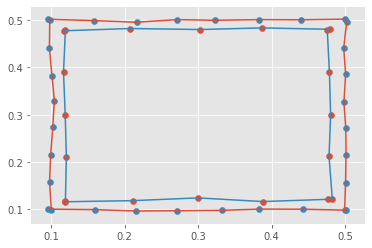

In [6]:
plt.plot(x1_0, y1_0)
plt.plot(x2_0, y2_0)
plt.scatter(x2_0, y2_0)
plt.scatter(x1_0, y1_0)
plt.show()

### step1

In [7]:
x2_0 = (np.linspace(12, 48, N2//4)+ np.random.randn(N2//4) * 0.2) * rate
x2_1 = (np.linspace(10, 50, N2//4) + np.random.randn(N2//4) * 0.2) * rate
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.ones(N2//4)*12 + np.random.randn(N2//4) * 0.2) * rate
y2_1 = (np.ones(N2//4)*10 + np.random.randn(N2//4) * 0.2) * rate
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2//4), np.ones(N2//4)])[:, None]
T2 = 1

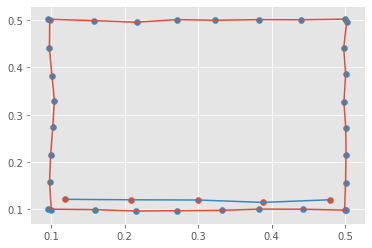

In [8]:
plt.plot(x1_0, y1_0)
plt.plot(x2_0, y2_0)
plt.scatter(x2_0, y2_0)
plt.scatter(x1_0, y1_0)
plt.show()

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[1.8453, 1.7785],
        [1.7785, 1.7597]])
sigma: tensor(-4.1153)
kernel: tensor([0.1348])
----- after learning -----
tensor([[1.8453, 1.7785],
        [1.7785, 1.7597]])


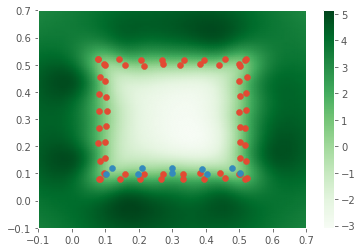

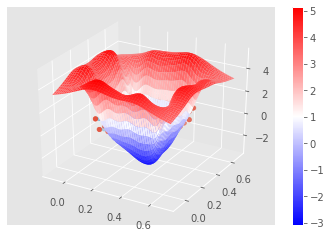

In [9]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.01])
model = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)

plot_all(model, kernel, x1,y1,x2,y2, rate)

### step2

In [12]:
x2_0 = (np.concatenate([np.linspace(12, 48, N2//4), np.ones(N2//4)*48]) + np.random.randn(N2//2) * 0.2) * rate
x2_1 = (np.concatenate([np.linspace(10, 50, N2//4), np.ones(N2//4)*50]) + np.random.randn(N2//2) * 0.2) * rate
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2//4)*12, np.linspace(12, 48, N2//4)]) + np.random.randn(N2//2) * 0.2) * rate
y2_1 = (np.concatenate([np.ones(N2//4)*10, np.linspace(10, 50, N2//4)]) + np.random.randn(N2//2) * 0.2) * rate
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2//2), np.ones(N2//2)])[:, None]
T2 = 1

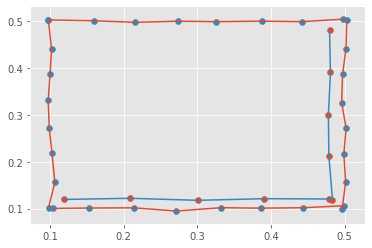

In [13]:
plt.plot(x1_0, y1_0)
plt.plot(x2_0, y2_0)
plt.scatter(x2_0, y2_0)
plt.scatter(x1_0, y1_0)
plt.show()

In [14]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.01])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
plot_all(model, kernel, x1,y1,x2,y2)

TypeError: plot_all() missing 1 required positional argument: 'rate'

### step3

In [ ]:
x2_0 = (np.concatenate([np.linspace(12, 48, N2//4), np.ones(N2//4)*48, np.linspace(48, 12, N2//4)]) + np.random.randn(N2//4*3) * 0.2) * rate
x2_1 = (np.concatenate([np.linspace(10, 50, N2//4), np.ones(N2//4)*50, np.linspace(50, 10, N2//4)]) + np.random.randn(N2//4*3) * 0.2) * rate
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2//4)*12, np.linspace(12, 48, N2//4), np.ones(N2//4) * 48]) + np.random.randn(N2//4*3) * 0.2) * rate
y2_1 = (np.concatenate([np.ones(N2//4)*10, np.linspace(10, 50, N2//4), np.ones(N2//4) * 50]) + np.random.randn(N2//4*3) * 0.2) * rate
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2//4*3), np.ones(N2//4*3)])[:, None]
T2 = 1

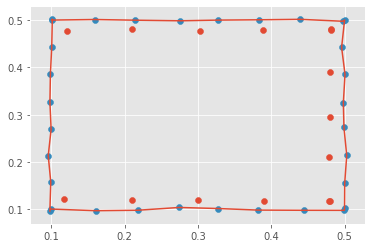

In [52]:
plt.plot(x1_0, y1_0)
plt.scatter(x2_0, y2_0)
plt.scatter(x1_0, y1_0)
plt.show()

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[1.1642, 1.2351],
        [1.2351, 1.3415]])
sigma: tensor(-5.4740)
kernel: tensor([0.1184])
----- after learning -----
tensor([[1.1642, 1.2351],
        [1.2351, 1.3415]])


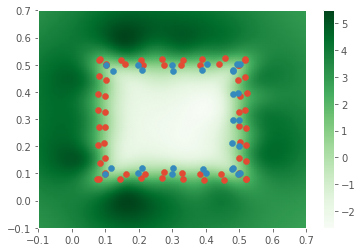

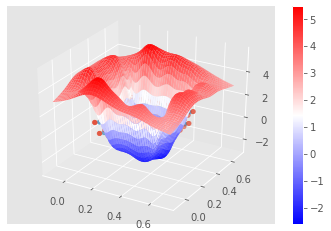

In [53]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.01])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
plot_all(model, kernel, x1,y1,x2,y2)

### step4

In [54]:
x2_0 = (np.concatenate([np.linspace(12, 48, N2//4), np.ones(N2//4)*48, np.linspace(48, 12, N2//4), np.ones(N2//4)*12]) + np.random.randn(N2) * 0.2) * rate
x2_1 = (np.concatenate([np.linspace(10, 50, N2//4), np.ones(N2//4)*50, np.linspace(50, 10, N2//4), np.ones(N2//4)*10]) + np.random.randn(N2) * 0.2) * rate
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2//4)*12, np.linspace(12, 48, N2//4), np.ones(N2//4)*48, np.linspace(48, 12, N2//4)]) + np.random.randn(N2) * 0.2) * rate
y2_1 = (np.concatenate([np.ones(N2//4)*10, np.linspace(10, 50, N2//4), np.ones(N2//4)*50, np.linspace(50, 10, N2//4)]) + np.random.randn(N2) * 0.2) * rate
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2), np.ones(N2)])[:, None]
T2 = 1

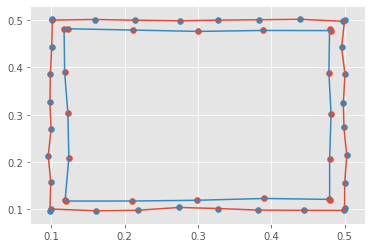

In [55]:
plt.plot(x1_0, y1_0)
plt.plot(x2_0, y2_0)
plt.scatter(x2_0, y2_0)
plt.scatter(x1_0, y1_0)
# plt.scatter(x1_1, y1_1)
plt.show()

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[1.0336, 1.0070],
        [1.0070, 1.0043]])
sigma: tensor(-5.6638)
kernel: tensor([0.1150])
----- after learning -----
tensor([[1.0336, 1.0070],
        [1.0070, 1.0043]])


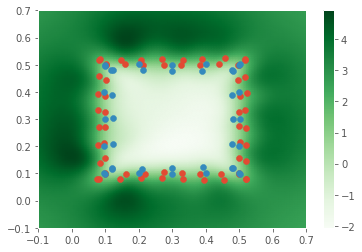

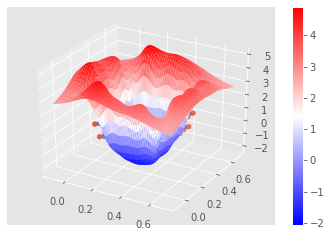

In [56]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.01])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
plot_all(model, kernel, x1,y1,x2,y2)

# sample2

### tacticle data

In [19]:
x2_0 = (np.concatenate([np.linspace(12, 25, N2//4), np.ones(N2//4)*25, np.linspace(25, 12, N2//4), np.ones(N2//4)*12]) + np.random.randn(N2) * 0.2) * rate + 0.1 
x2_1 = (np.concatenate([np.linspace(10, 27, N2//4), np.ones(N2//4)*27, np.linspace(27, 10, N2//4), np.ones(N2//4)*10]) + np.random.randn(N2) * 0.2) * rate + 0.1
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2//4)*12, np.linspace(12, 25, N2//4), np.ones(N2//4)*25, np.linspace(25, 12, N2//4)]) + np.random.randn(N2) * 0.2) * rate + 0.1
y2_1 = (np.concatenate([np.ones(N2//4)*10, np.linspace(10, 27, N2//4), np.ones(N2//4)*27, np.linspace(27, 10, N2//4)]) + np.random.randn(N2) * 0.2) * rate + 0.1
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2), np.ones(N2)])[:, None]
T2 = 1

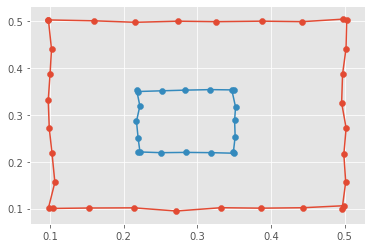

In [23]:
plt.plot(x1_0, y1_0)
plt.plot(x2_0, y2_0)
plt.scatter(x1_0, y1_0)
plt.scatter(x2_0, y2_0)

# plt.scatter(x2_1, y2_1)
# plt.scatter(x1_1, y1_1)
plt.show()

In [24]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
# plot_all(model, kernel, x1,y1,x2,y2, rate)

----- before learning -----
tensor([[1.2297, 0.6258],
        [0.6258, 2.1347]])
-------------------------------------
-33.81340026855469
-------------------------------------
-33.845672607421875
-------------------------------------
-33.88246154785156
-------------------------------------
-33.91631317138672
-------------------------------------
-33.95994567871094
-------------------------------------
-34.00202941894531
-------------------------------------
-34.05232238769531
-------------------------------------
-34.107337951660156
-------------------------------------
-34.17390441894531
-------------------------------------
-34.257293701171875
-------------------------------------
-34.36567687988281
-------------------------------------
-34.50297546386719
-------------------------------------
-34.67842102050781
-------------------------------------
-34.89210510253906
-------------------------------------
-35.147552490234375
-------------------------------------
-35.43206787109375
---

-------------------------------------
-49.25079345703125
-------------------------------------
-49.25407409667969
-------------------------------------
-49.2623291015625
-------------------------------------
-49.268463134765625
-------------------------------------
-49.27369689941406
-------------------------------------
-49.28026580810547
-------------------------------------
-49.285179138183594
-------------------------------------
-49.291778564453125
-------------------------------------
-49.296905517578125
-------------------------------------
-49.300018310546875
-------------------------------------
-49.30677032470703
-------------------------------------
-49.31053161621094
-------------------------------------
-49.314361572265625
-------------------------------------
-49.32038879394531
-------------------------------------
-49.324371337890625
-------------------------------------
-49.3282470703125
-------------------------------------
-49.33134460449219
--------------------------

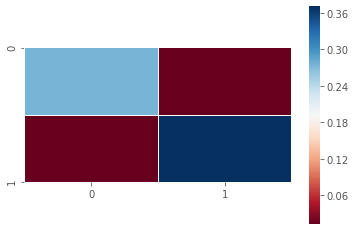

In [26]:
print("----- before learning -----")
print(model.task_params_to_psd())
model.learning(max_iter=4000)
print("----- after learning -----")
print(model.task_params_to_psd())

colormap = plt.cm.RdBu
sns.heatmap(model.task_params_to_psd().numpy(), linewidths=0.1, 
        square=True, cmap=colormap, linecolor='white')
plt.savefig('similarity.png')

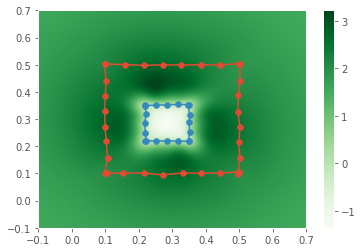

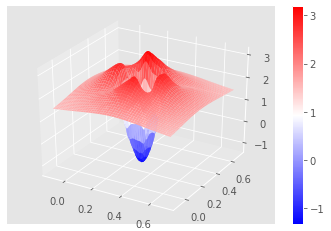

In [28]:
x   = np.linspace(-10, 70, 100)[:, None] * rate
y   = np.linspace(-10, 70, 100)[:, None] * rate
x,y = np.meshgrid(x, y)
xx  = x.ravel()[:, None]
yy  = y.ravel()[:, None]
XX  = np.concatenate([xx, yy], 1)
XX  = torch.from_numpy(XX).float()

mm1, ss1 = model.predict(XX, 0)
mm2, ss2 = model.predict(XX, 1)

mm1 = mm1.reshape(x.shape)
mm2 = mm2.reshape(x.shape)

z = mm2.numpy()

xyz = plt.pcolormesh(x, y, z, cmap='Greens', shading="gouraud", vmax=z.max(), vmin=z.min())
plt.plot(x1_0, y1_0)
plt.plot(x2_0, y2_0)
plt.scatter(x1_0, y1_0)
plt.scatter(x2_0, y2_0)
plt.colorbar(xyz)
# plt.savefig('mtgpis.png')
plt.show()

# %matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x1.ravel(), y1.ravel(), np.array(Y1).ravel())
# ax.scatter(x2.ravel(), y2.ravel(), np.array(Y2).ravel())

surf = ax.plot_surface(x, y, z, cmap='bwr', linewidth=0)
fig.colorbar(surf)
# plt.savefig('mtgpis_3d.png')
plt.show()

# sample3

In [41]:
x2_0 = (np.concatenate([np.linspace(12, 48, N2//4), np.ones(N2//4)*48, np.linspace(48, 12, N2//4), np.ones(N2//4)*12,
                                     np.linspace(15, 45, N2//4), np.ones(N2//4)*45, np.linspace(45, 15, N2//4), np.ones(N2//4)*15]) 
            + np.random.randn(N2*2) * 0.2) * rate

x2_1 = (np.concatenate([np.linspace(10, 50, N2//4), np.ones(N2//4)*50, np.linspace(50, 10, N2//4), np.ones(N2//4)*10,
                                      np.linspace(17, 43, N2//4), np.ones(N2//4)*43, np.linspace(43, 17, N2//4), np.ones(N2//4)*17]) 
            + np.random.randn(N2*2) * 0.2) * rate
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2//4)*12, np.linspace(12, 48, N2//4), np.ones(N2//4)*48, np.linspace(48, 12, N2//4),
                                      np.ones(N2//4)*15, np.linspace(15, 45, N2//4), np.ones(N2//4)*45, np.linspace(45, 15, N2//4)]) 
            + np.random.randn(N2*2) * 0.2) * rate
y2_1 = (np.concatenate([np.ones(N2//4)*10, np.linspace(10, 50, N2//4), np.ones(N2//4)*50, np.linspace(50, 10, N2//4),
                                      np.ones(N2//4)*17, np.linspace(17, 43, N2//4), np.ones(N2//4)*43, np.linspace(43, 17, N2//4)]) 
            + np.random.randn(N2*2) * 0.2) * rate
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2*2), np.ones(N2*2)])[:, None]
T2 = 1

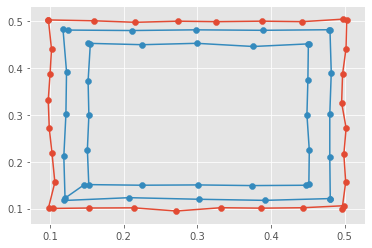

In [44]:
plt.plot(x1_0, y1_0)
plt.plot(x2_0, y2_0)
plt.scatter(x1_0, y1_0)
plt.scatter(x2_0, y2_0)

# plt.scatter(x2_1, y2_1)
# plt.scatter(x1_1, y1_1)
plt.show()

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
-------------------------------------
1043.2691650390625
-------------------------------------
547.12548828125
-------------------------------------
432.06964111328125
-------------------------------------
357.519287109375
-------------------------------------
299.5108642578125
-------------------------------------
251.8485870361328
-------------------------------------
212.0221710205078
-------------------------------------
178.65147399902344
-------------------------------------
150.7545623779297
-------------------------------------
127.49665069580078
-------------------------------------
108.13003540039062
-------------------------------------
91.99630737304688
-------------------------------------
78.53024291992188
-------------------------------------
67.25946044921875
-------------------------------------
57.79204559326172
-------------------------------------
49.8060188293457
----------------------

-------------------------------------
-97.5634994506836
-------------------------------------
-97.90385437011719
-------------------------------------
-98.23970031738281
-------------------------------------
-98.56472778320312
-------------------------------------
-98.88214111328125
-------------------------------------
-99.18435668945312
-------------------------------------
-99.49053955078125
-------------------------------------
-99.78623962402344
-------------------------------------
-100.06419372558594
-------------------------------------
-100.34144592285156
-------------------------------------
-100.60953521728516
-------------------------------------
-100.87298583984375
-------------------------------------
-101.12525939941406
-------------------------------------
-101.37195587158203
-------------------------------------
-101.62014770507812
-------------------------------------
-101.85394287109375
-------------------------------------
-102.08624267578125
-----------------------

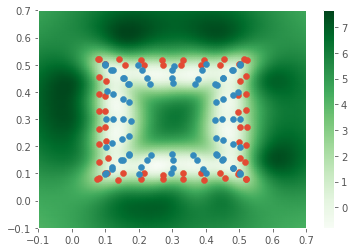

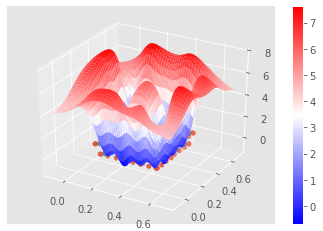

In [43]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
plot_all(model, kernel, x1,y1,x2,y2, rate)

# sample4

In [4]:
N1 = 8
N2 = 6
rate = 0.01 # data scale
%matplotlib inline

In [11]:
x1_0 = (np.concatenate([np.ones(N1)*50, np.linspace(50, 10, N1), np.ones(N1)*10]) + np.random.randn(N1*3) * 0.2) * rate
x1_1 = (np.concatenate([np.ones(N1)*52, np.linspace(52, 8, N1), np.ones(N1)*8]) + np.random.randn(N1*3) * 0.2) * rate
x1    = np.concatenate([x1_0, x1_1])[:, None]

y1_0 = (np.concatenate([np.linspace(10, 50, N1), np.ones(N1)*50, np.linspace(50, 10, N1)]) + np.random.randn(N1*3) * 0.2) * rate
y1_1 = (np.concatenate([np.linspace(8, 52, N1), np.ones(N1)*52, np.linspace(52, 8, N1)]) + np.random.randn(N1*3) * 0.2) * rate
y1    = np.concatenate([y1_0, y1_1])[:, None]

X1 = np.concatenate([x1,y1],1)
Y1 = np.concatenate([np.zeros(len(x1_0)), np.ones(len(x1_1)) ])[:, None]
T1 = 0

In [16]:
x2_0 = np.concatenate([np.linspace(40, 20, N2), np.ones(N2)*20, np.linspace(20, 12, N2//2)]) 
x2_0 = (x2_0 + np.random.randn(len(x2_0)) * 0.2) * rate  

x2_1 = np.concatenate([np.linspace(38, 22, N2), np.ones(N2)*22, np.linspace(22, 10, N2//2)]) 
x2_1 = (x2_1 + np.random.randn(len(x2_1)) * 0.2) * rate
                       
x2    = np.concatenate([x2_0, x2_1])[:, None]


y2_0 = np.concatenate([np.ones(N2)*20, np.linspace(20, 45, N2), np.ones(N2//2)*45]) 
y2_0 = (y2_0 + np.random.randn(len(y2_0)) * 0.2) * rate 
    
y2_1 = np.concatenate([np.ones(N2)*22, np.linspace(22, 47, N2), np.ones(N2//2)*47]) 
y2_1 = (y2_1 + np.random.randn(len(y2_1)) * 0.2) * rate 
    
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(len(x2_0)), np.ones(len(x2_1))])[:, None]
T2 = 1
print(X2.shape)
print(Y2.shape)

(30, 2)
(30, 1)


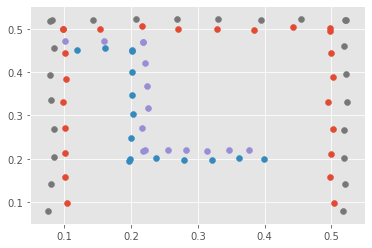

In [17]:
# plt.plot(x1_0, y1_0)
# plt.plot(x2_0, y2_0)
plt.scatter(x1_0, y1_0)
plt.scatter(x2_0, y2_0)

plt.scatter(x2_1, y2_1)
plt.scatter(x1_1, y1_1)
plt.show()

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[1.7068, 0.8758],
        [0.8758, 2.3571]])
sigma: tensor(-2.8217)
kernel: tensor([0.1666])
----- after learning -----
tensor([[1.7068, 0.8758],
        [0.8758, 2.3571]])


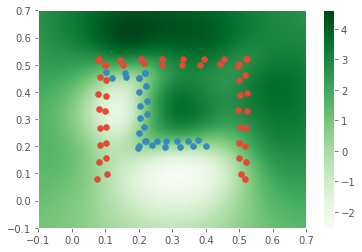

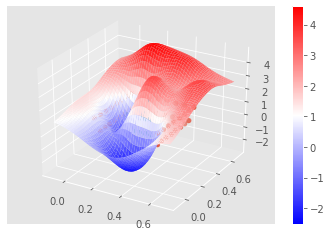

In [18]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
plot_all(model, kernel, x1,y1,x2,y2, rate)

In [ ]:
N2 = 6
x2_0 = np.concatenate([np.ones(N2)*48, np.linspace(48, 40, N2//2), np.ones(N2)*40, 
                                     np.linspace(40, 20, N2), np.ones(N2)*20, np.linspace(20, 12, N2//2), np.ones(N2)*12]) 
x2_0 = (x2_0 + np.random.randn(len(x2_0)) * 0.2) * rate  

x2_1 = np.concatenate([np.ones(N2)*50, np.linspace(50, 38, N2//2), np.ones(N2)*38, 
                                     np.linspace(38, 22, N2), np.ones(N2)*22, np.linspace(22, 10, N2//2), np.ones(N2)*10]) 
x2_1 = (x2_1 + np.random.randn(len(x2_1)) * 0.2) * rate
                       
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = np.concatenate([np.linspace(12, 48, N2), np.ones(N2//2)*48, np.linspace(48, 30, N2),
                                     np.ones(N2)*30, np.linspace(30, 48, N2), np.ones(N2//2)*48, np.linspace(48, 12, N2)]) 
y2_0 = (y2_0 + np.random.randn(len(y2_0)) * 0.2) * rate 
    
y2_1 = np.concatenate([np.linspace(10, 50, N2), np.ones(N2//2)*50, np.linspace(50, 32, N2),
                                     np.ones(N2)*32, np.linspace(32, 50, N2), np.ones(N2//2)*50, np.linspace(50, 10, N2)]) 
y2_1 = (y2_1 + np.random.randn(len(y2_1)) * 0.2) * rate 
    
# y2_1 = (np.concatenate([np.ones(N2//4)*10, np.linspace(10, 27, N2//4), np.ones(N2//4)*27, np.linspace(27, 10, N2//4)]) + np.random.randn(N2) * 0.2) * rate 

y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(len(x2_0)), np.ones(len(x2_1))])[:, None]
T2 = 1
print(X2.shape)
print(Y2.shape)